In [18]:
import os
from pathlib import Path

directory = "../data/raw/"
filenames = []

for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)  # Полный путь к файлу
    if os.path.isfile(file_path):  # Проверка, что это файл (не папка)
        # if "Aguiar_Gopinath_2007" in filename:
        filenames.append("../data/raw/" + filename)
filenames[:5]

['../data/raw/Gali_2008_chapter_2_9c789a7c.csv',
 '../data/raw/Gali_2008_chapter_2_754f3eba.csv',
 '../data/raw/Gali_2008_chapter_2_32ca0016.csv',
 '../data/raw/Gali_2008_chapter_2_0ee38327.csv',
 '../data/raw/Gali_2008_chapter_2_17a847ac.csv']

In [20]:
import pandas as pd

raw_data = pd.read_csv("../data/raw/Gali_2008_chapter_2_754f3eba.csv")
raw_data.head()

,Consumption,Real Wage,Inflation,AR(1) Technology Process,Hours Worked,Nominal Interest Rate,Real Interest Rate,Output,Money Growth,eps_A,eps_m
0,0.888103,0.746135,1.000000,1.000000,0.846283,0.945180,0.945180,0.888103,0.000000,0.000,0.000
1,0.884729,0.733523,0.051129,0.964790,0.852584,0.071806,1.448002,0.781212,29.143166,0.000,0.000
2,1.317075,1.118004,0.049574,1.483530,0.835785,0.374090,1.301858,1.345039,-36.404960,0.500,0.500
3,1.796612,1.550681,0.286742,2.066086,0.823909,0.478458,1.263912,1.821529,-7.728095,0.463,0.463
4,2.377051,2.075631,0.377890,2.764117,0.814622,0.543034,0.846613,2.387224,-4.851463,0.442,0.442


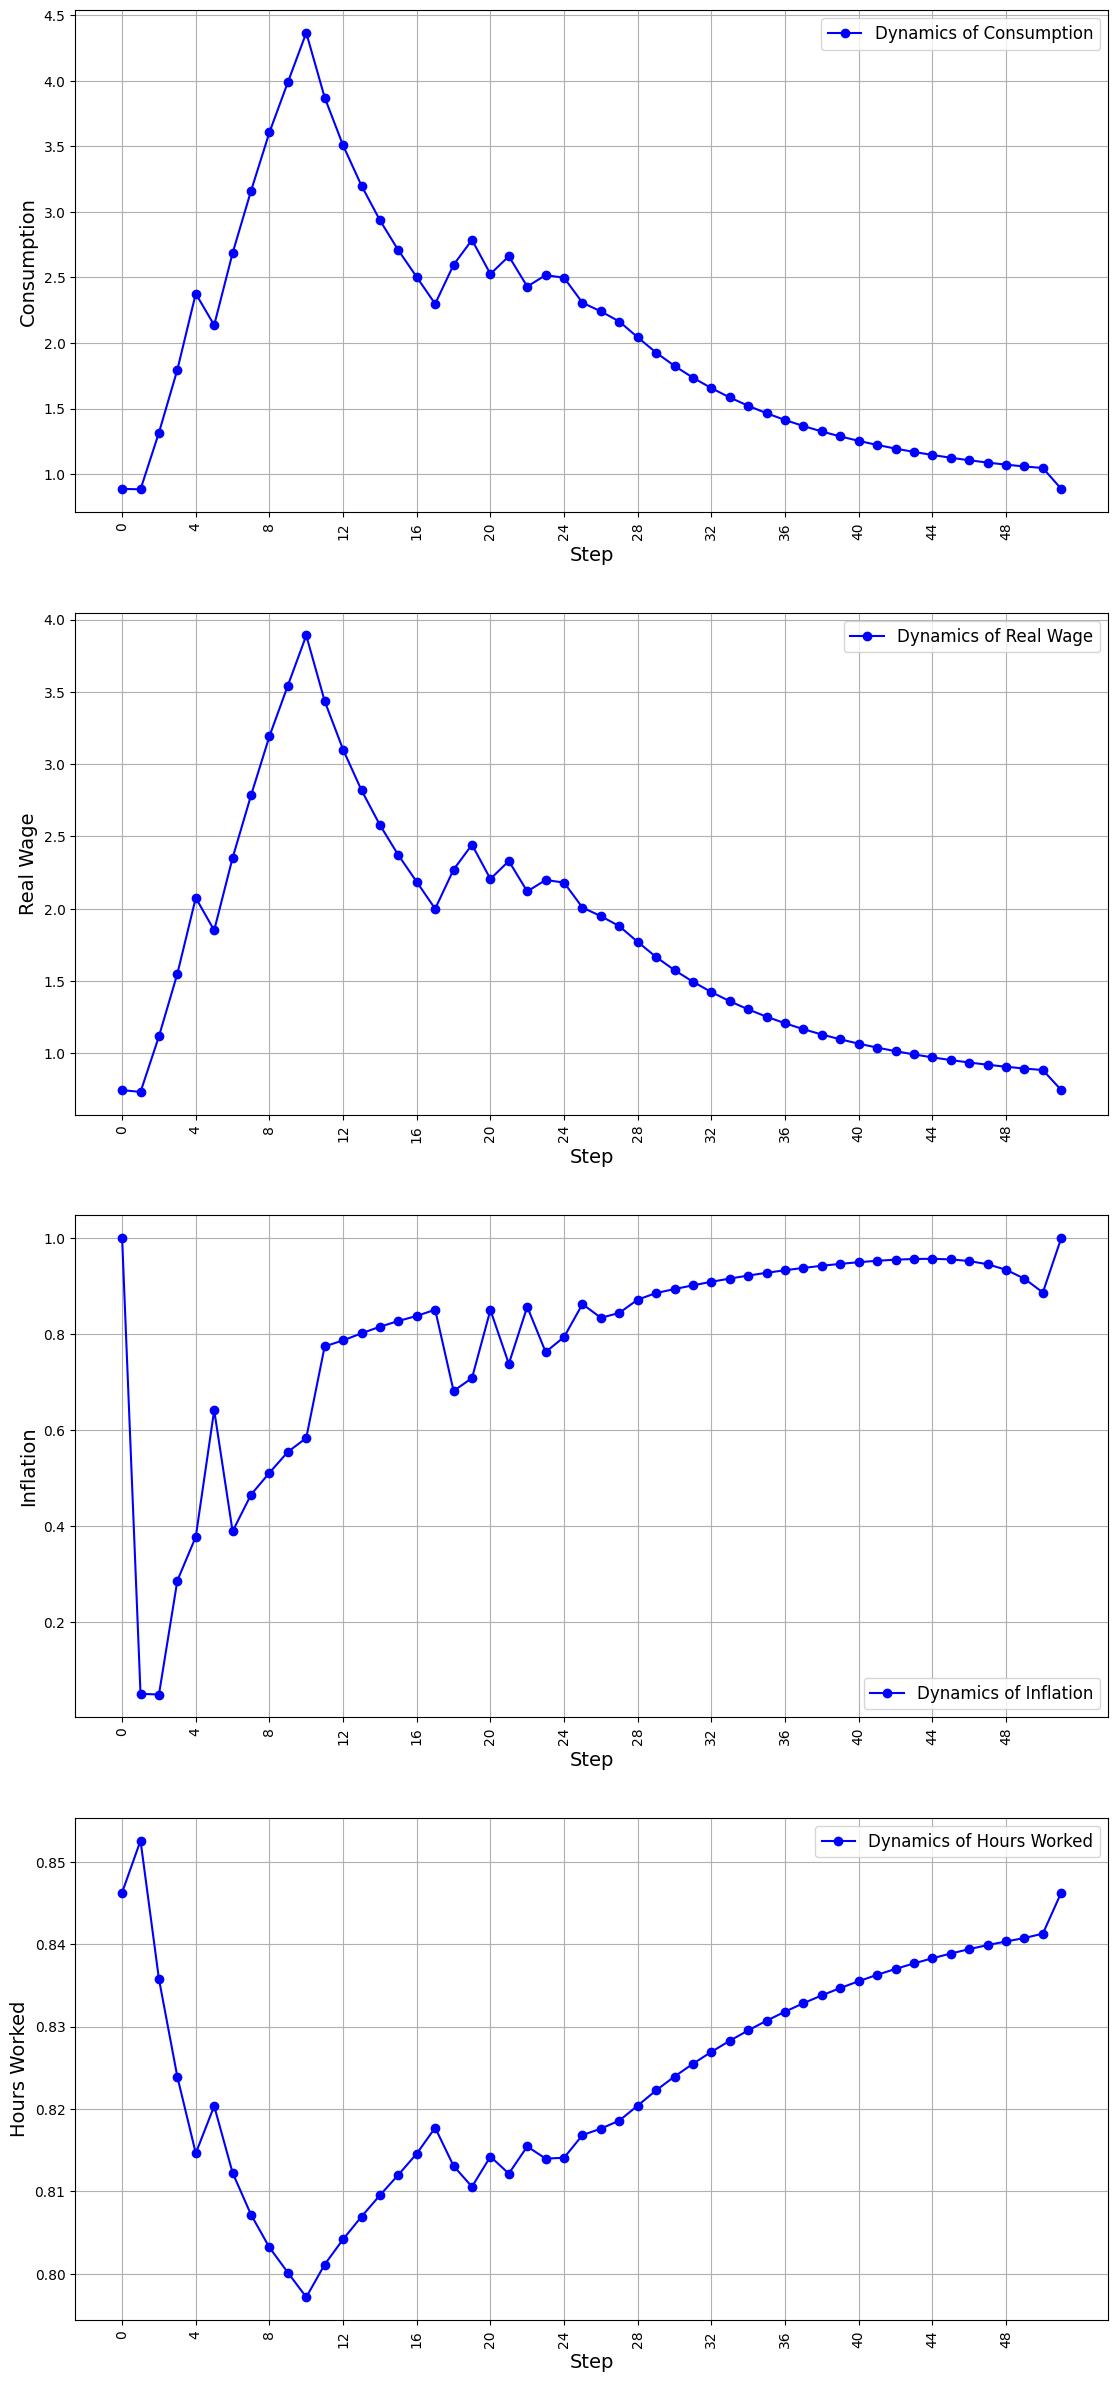

In [21]:
import matplotlib.pyplot as plt
import numpy as np

columns = ["Consumption", "Real Wage", "Inflation", "Hours Worked"]
# columns = ["y", "c", "k", "invest"]


fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(13.33, 7.5 * len(columns)))

for idx, column in enumerate(columns):
    
    column_values = raw_data[column].to_numpy()
    
    steps = np.arange(len(column_values))
    
    ax = axes[idx]
    
    ax.plot(steps, column_values, marker='o', color='blue', label=f"Dynamics of {column}")
    
    
    ax.legend(fontsize=12)
    ax.set_xlabel("Step", fontsize=14)
    ax.set_ylabel(f"{column}", fontsize=14)
    ax.set_xticks(steps[::4])
    # ax.set_yticks(np.arange(np.min(column_values), np.max(column_values)))
    ax.set_xticklabels(ax.get_xticks(), rotation=90)
    ax.grid(True)

In [28]:
import pandas as pd
import numpy as np

def calculate_utility(df: pd.DataFrame, beta: float, sigma: float, phi: float) -> pd.Series:
    """
    Рассчитывает ожидаемую дисконтированную полезность для каждого шага симуляции.
    
    :param df: DataFrame с данными симуляции.
    :param beta: Коэффициент дисконтирования.
    :param sigma: Параметр неприятия риска.
    :param phi: Параметр эластичности предложения труда.
    :return: Series с ожидаемой полезностью для каждого шага.
    """
    # Извлекаем данные
    C = df['Consumption'].values  # Потребление
    N = df['Hours Worked'].values  # Отработанные часы
    T = len(C)  # Количество периодов

    # Вектор для хранения полезности
    utility = np.zeros(T)

    # Рассчитываем полезность для каждого шага
    for t in range(T):
        # Сумма полезностей для всех будущих периодов
        discounted_sum = 0.0
        for s in range(T - t):
            # Полезность в периоде t+s
            if sigma == 1:
                u_t_s = np.log(C[t + s]) - (N[t + s] ** (1 + phi)) / (1 + phi)
            else:
                u_t_s = (C[t + s] ** (1 - sigma)) / (1 - sigma) - (N[t + s] ** (1 + phi)) / (1 + phi)
            
            # Дисконтированная полезность
            discounted_sum += (beta ** s) * u_t_s
        
        # Сохраняем результат
        utility[t] = discounted_sum

    return pd.Series(utility, index=df.index)



raw_data["Utility"] = calculate_utility(raw_data, beta=0.99, sigma=1.0, phi=1.0)

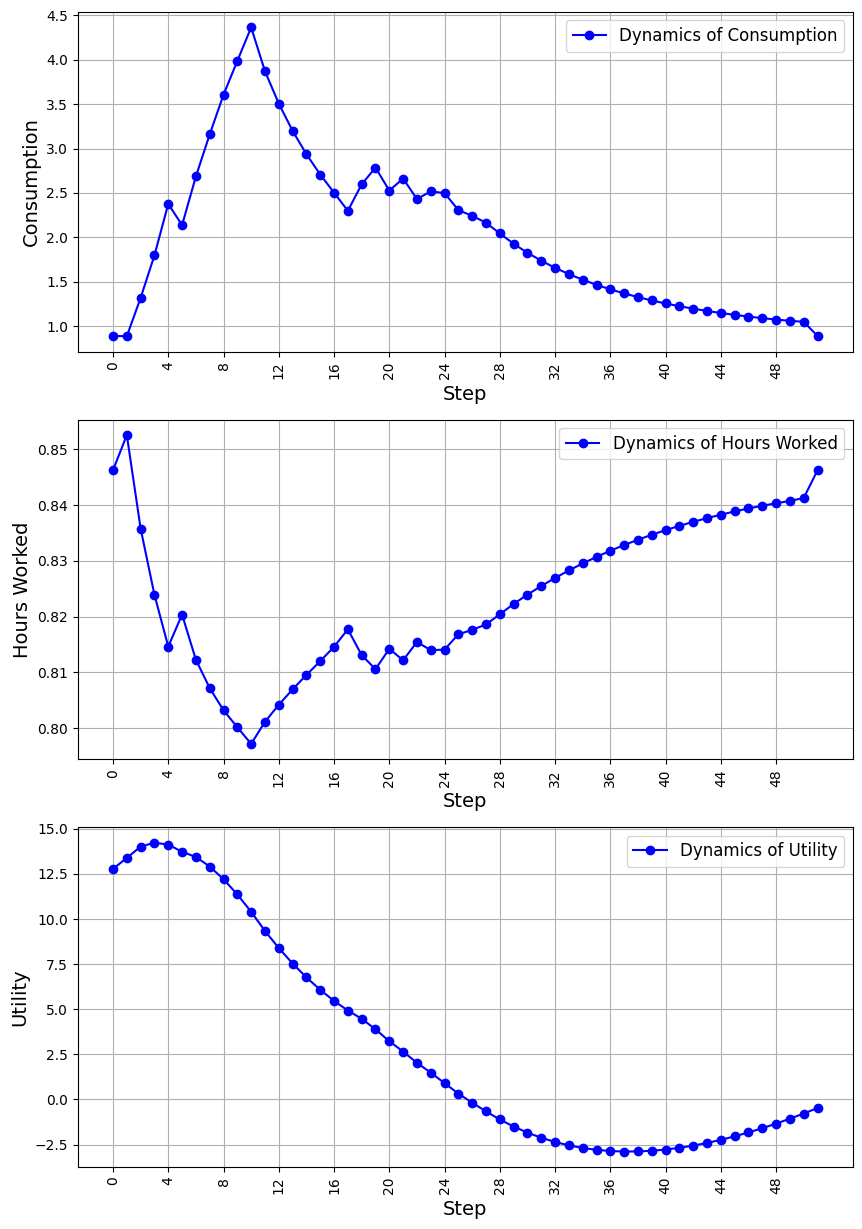

In [35]:
import matplotlib.pyplot as plt
import numpy as np

columns = ["Consumption", "Hours Worked", "Utility"]
# columns = ["y", "c", "k", "invest"]


fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 5 * len(columns)))

for idx, column in enumerate(columns):
    
    column_values = raw_data[column].to_numpy()
    
    steps = np.arange(len(column_values))
    
    ax = axes[idx]
    
    ax.plot(steps, column_values, marker='o', color='blue', label=f"Dynamics of {column}")
    
    
    ax.legend(fontsize=12)
    ax.set_xlabel("Step", fontsize=14)
    ax.set_ylabel(f"{column}", fontsize=14)
    ax.set_xticks(steps[::4])
    # ax.set_yticks(np.arange(np.min(column_values), np.max(column_values)))
    ax.set_xticklabels(ax.get_xticks(), rotation=90)
    ax.grid(True)